In [29]:
import torch
from pathlib import Path
import requests

DATA_PATH = Path("data/")

IMAGE_PATH = DATA_PATH / "pizza-steak-sushi"

if IMAGE_PATH.is_dir():
  pass
else:
  print(f"Creating the {IMAGE_PATH} directory...")
  IMAGE_PATH.mkdir(exist_ok=True, parents=True)

with open(DATA_PATH / "pizza-steak-sushi.zip", 'wb') as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

In [30]:
import zipfile

with zipfile.ZipFile(DATA_PATH / "pizza-steak-sushi.zip", 'r') as zip_ref:
  print("Unzipping the pizza, sushi and steak...")
  zip_ref.extractall(IMAGE_PATH)

Unzipping the pizza, sushi and steak...


In [31]:
import os
def walk_dir(dir_path):
  """young jesus"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [32]:
walk_dir(IMAGE_PATH)

There are 2 directories and 0 images in 'data/pizza-steak-sushi'
There are 3 directories and 0 images in 'data/pizza-steak-sushi/train'
There are 0 directories and 78 images in 'data/pizza-steak-sushi/train/pizza'
There are 0 directories and 75 images in 'data/pizza-steak-sushi/train/steak'
There are 0 directories and 72 images in 'data/pizza-steak-sushi/train/sushi'
There are 3 directories and 0 images in 'data/pizza-steak-sushi/test'
There are 0 directories and 25 images in 'data/pizza-steak-sushi/test/pizza'
There are 0 directories and 19 images in 'data/pizza-steak-sushi/test/steak'
There are 0 directories and 31 images in 'data/pizza-steak-sushi/test/sushi'


In [33]:
train_dir = IMAGE_PATH / "train"
test_dir = IMAGE_PATH / "test"

Image name is steak
Image height is 512
Image width is 512


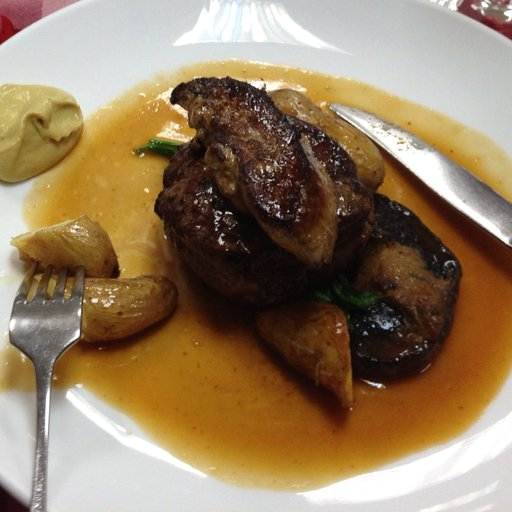

In [34]:
import random
from PIL import Image
image_path_list = list(IMAGE_PATH.glob('*/*/*.jpg'))
random_image_path = random.choice(image_path_list)
random_image_path

img = Image.open(random_image_path)
img_class = random_image_path.parent.stem
print(f'Image name is {img_class}')
print(f'Image height is {img.height}')
print(f'Image width is {img.width}')
img

<Figure size 1400x900 with 0 Axes>

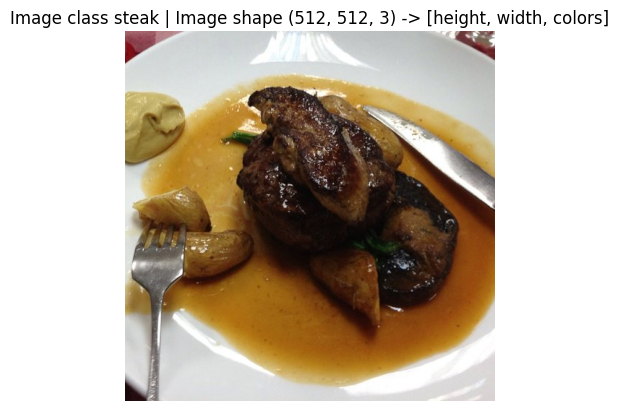

<Figure size 1400x900 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
import numpy as np

img_as_array = np.asarray(img)
plt.imshow(img_as_array)
plt.title(f"Image class {img_class} | Image shape {img_as_array.shape} -> [height, width, colors]")
plt.axis(False)
plt.figure(figsize=(14,9))

array([[[165,  98, 107],
        [163,  96, 105],
        [165,  98, 107],
        ...,
        [118,  83,  79],
        [162, 135, 128],
        [196, 173, 165]],

       [[163,  96, 105],
        [163,  96, 105],
        [165,  98, 107],
        ...,
        [142, 109, 104],
        [181, 156, 149],
        [197, 177, 168]],

       [[162,  97, 105],
        [163,  98, 106],
        [163,  98, 106],
        ...,
        [147, 118, 114],
        [193, 170, 164],
        [200, 181, 174]],

       ...,

       [[ 26,  10,  11],
        [ 27,  11,  12],
        [ 30,  11,  13],
        ...,
        [216, 211, 208],
        [216, 211, 208],
        [216, 211, 208]],

       [[ 29,  10,  12],
        [ 28,   9,  11],
        [ 27,   8,  10],
        ...,
        [216, 211, 208],
        [216, 211, 208],
        [216, 211, 208]],

       [[ 27,   8,  10],
        [ 24,   5,   7],
        [ 22,   3,   5],
        ...,
        [216, 211, 208],
        [216, 211, 208],
        [216, 211, 208]]], dtype=uint8)
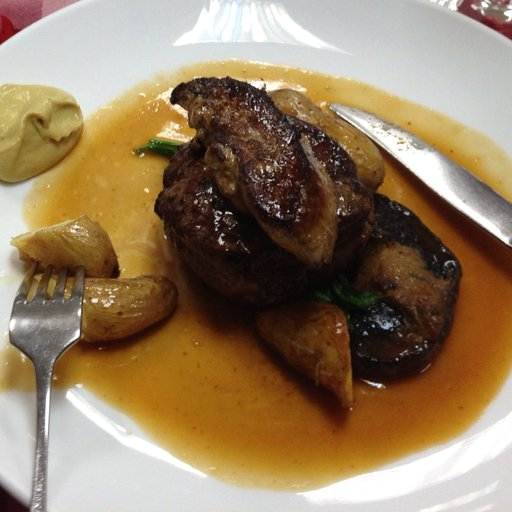

In [36]:
img_as_array

In [37]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

data_transform(img)

tensor([[[0.6157, 0.6196, 0.6157,  ..., 0.5804, 0.5373, 0.6118],
         [0.5569, 0.5608, 0.5647,  ..., 0.5098, 0.5294, 0.7843],
         [0.5176, 0.5373, 0.5333,  ..., 0.4667, 0.5098, 0.6549],
         ...,
         [0.2118, 0.4784, 0.7294,  ..., 0.8824, 0.8549, 0.8549],
         [0.1059, 0.1882, 0.4118,  ..., 0.8627, 0.8549, 0.8549],
         [0.1059, 0.1373, 0.1765,  ..., 0.8824, 0.8510, 0.8471]],

        [[0.3490, 0.3529, 0.3490,  ..., 0.5137, 0.4353, 0.5098],
         [0.2431, 0.2667, 0.2745,  ..., 0.4157, 0.4588, 0.7647],
         [0.1098, 0.2000, 0.2549,  ..., 0.2314, 0.3373, 0.5451],
         ...,
         [0.1529, 0.4392, 0.7176,  ..., 0.8745, 0.8392, 0.8353],
         [0.0392, 0.1137, 0.3569,  ..., 0.8431, 0.8314, 0.8314],
         [0.0353, 0.0510, 0.0863,  ..., 0.8549, 0.8275, 0.8275]],

        [[0.3804, 0.3843, 0.3922,  ..., 0.4745, 0.4118, 0.4980],
         [0.2784, 0.3137, 0.3255,  ..., 0.3647, 0.4039, 0.7412],
         [0.1451, 0.2431, 0.2980,  ..., 0.2235, 0.3059, 0.

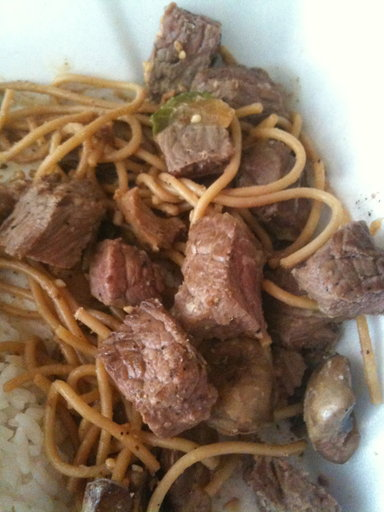

In [38]:
Image.open(image_path_list[78])

In [39]:
def plot_transform_images(
    image_path_list: list,
    transform,
    n=3,
    seed=None
):
  if seed:
    torch.manual_seed(seed)
  rand_img_path_list = random.sample(image_path_list, k=n)
  for rand_img in rand_img_path_list:
    with Image.open(rand_img) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original Image\nSize: {f.size}")
      ax[0].axis(False)

      transformed_img = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_img)
      ax[1].set_title(f"Transformed Image\nShape: {transformed_img.shape}")
      ax[1].axis("off")

      class_name = rand_img.parent.stem
      fig.suptitle(f"Class: {class_name}", fontsize=16)


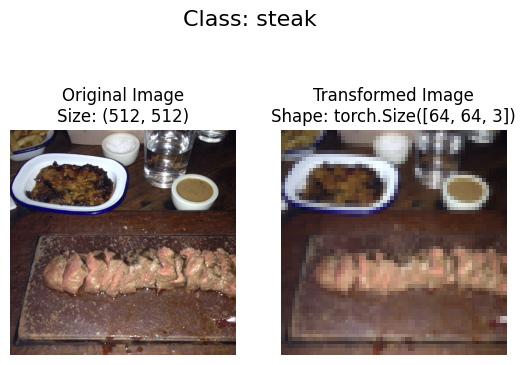

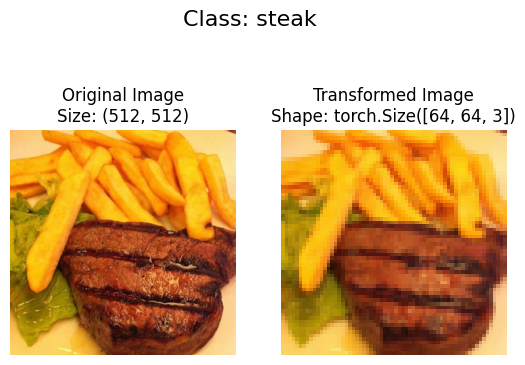

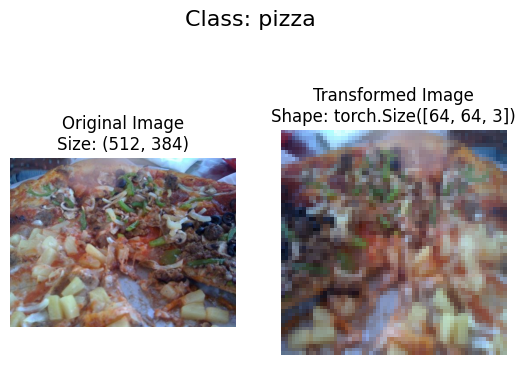

In [40]:
plot_transform_images(image_path_list, data_transform, seed=42)

In [41]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

In [42]:
len(train_data), len(test_data)

(225, 75)

In [43]:
img, label = train_data[0][0], train_data[0][1]

print(f"Train data shape -> {img.size}")
print(f"Image shape -> {img.shape}")
print(f"Image dtype -> {img.dtype}")
print(f"Label type -> {type(label)}")
print(f"Image tensor -> {img}")

Train data shape -> <built-in method size of Tensor object at 0x7ea8eb255490>
Image shape -> torch.Size([3, 64, 64])
Image dtype -> torch.float32
Label type -> <class 'int'>
Image tensor -> tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

In [44]:
class_dict = train_data.class_to_idx

In [45]:
class_names = train_data.classes


In [46]:
img_permuted = img.permute(1,2,0)

(-0.5, 63.5, 63.5, -0.5)

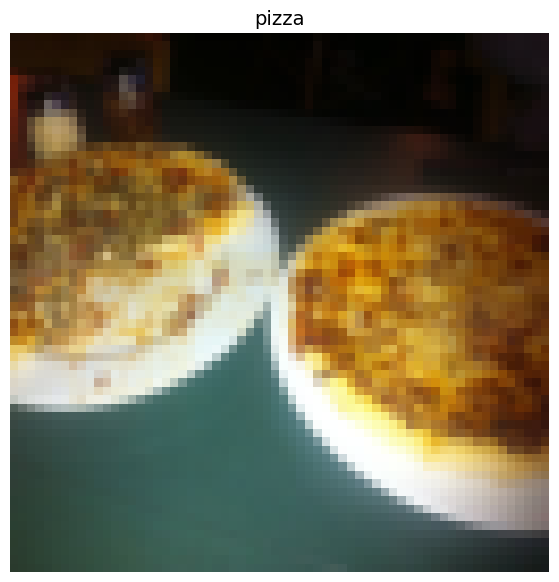

In [47]:
plt.figure(figsize=(10,7))
plt.title(class_names[label], fontsize=14)
plt.imshow(img_permuted)
plt.axis("off")

In [48]:
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [49]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               num_workers=os.cpu_count())

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count())

In [50]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [51]:
img, label = next(iter(train_dataloader))

In [52]:
import os
def scan_dir(target_dir: str):
  classes = sorted([entry.name for entry in list(os.scandir(target_dir)) if entry.is_dir()])

  if not classes:
    raise FileNotFoundError("Classes doesn't exist!")
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

  return classes, class_to_idx

In [56]:
scan_dir(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})